In [1]:
# 🖼️ Image Classification — Data Exploration

#**Author:** Kevin Woods  
#**Role:** Applied ML Engineer 
#**Project:** Image Classification API (PyTorch + FastAPI)  
#**Date:** October 2025  

#---

#### 🎯 **Objective**
#Explore and understand the CIFAR-10 image dataset.  
#Perform data loading, visualization, and preprocessing setup to prepare for model training.

#---

### 🧩 **Goals**
#- Load and inspect the CIFAR-10 dataset  
#- Visualize sample images and class distributions  
#- Define image transformations (resize, normalization)  
#- Compute dataset mean and standard deviation for later model normalization  

#---

### 🧠 **Next Step**
#After completing this notebook, proceed to '02_training.ipynb' to fine-tune a pretrained **ResNet18** model using the prepared dataset and transforms.






In [12]:
# 🖼️ Image Classification — Data Exploration Notebook
# Author: Kevin Woods
# Purpose: Explore dataset, visualize images, and define transforms for CNN training.

import torch
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

In [13]:
# Dataset Setup

# Define dataset root folder
data_dir = "../data"

# Define transforations for training and validation
transform = transforms.Compose([
    transforms.Resize((224, 224)), #ResNet input size
    transforms.ToTensor(),
])

# Download CIFAR-10 (only once)
train_data = datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root=data_dir, train=False, download=True, transform=transform)

# Class labels
classes = train_data.classes
print(f"Classes: {classes}")

Files already downloaded and verified
Files already downloaded and verified
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
# DataLoader Preview

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}")
print(f"Label indices: {labels[:10].tolist()}")

Batch shape: torch.Size([32, 3, 224, 224])
Label indices: [2, 8, 2, 0, 4, 9, 2, 5, 6, 6]


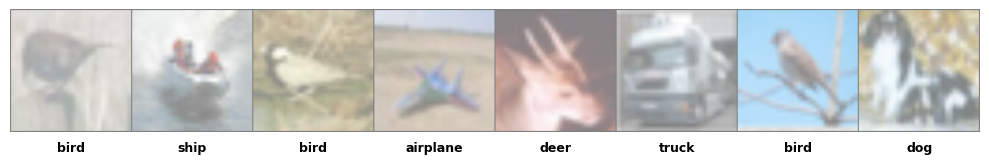

In [19]:
# Visualize Sample Images - with class labels

def imshow(img, title=None):
    # Display a single image tensor as a matplotlib image
    img = img / 2 + 0.5 # unnormalize if normalized later
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title: 
        plt.title(title)
    plt.axis('off')

# Create a grid of 8 sample images
grid_img = torchvision.utils.make_grid(images[:8], nrow=8)

# Display the grid
plt.figure(figsize=(10, 4))
imshow(grid_img)

# Dynamically space labels - Add class labels below each image
n_images = 8
grid_width = grid_img.shape[2]
step = grid_width / n_images  # width per image in the grid

for i in range(n_images):
    label_idx = labels[i].item()
    plt.text(
        x = (i * step + step / 2), # center text under each image
        y=245,                     # vertical placement
        s=classes[label_idx],
        fontsize=9, ha='center', va='top', color='black', weight='bold'
    )

plt.tight_layout()
plt.show()

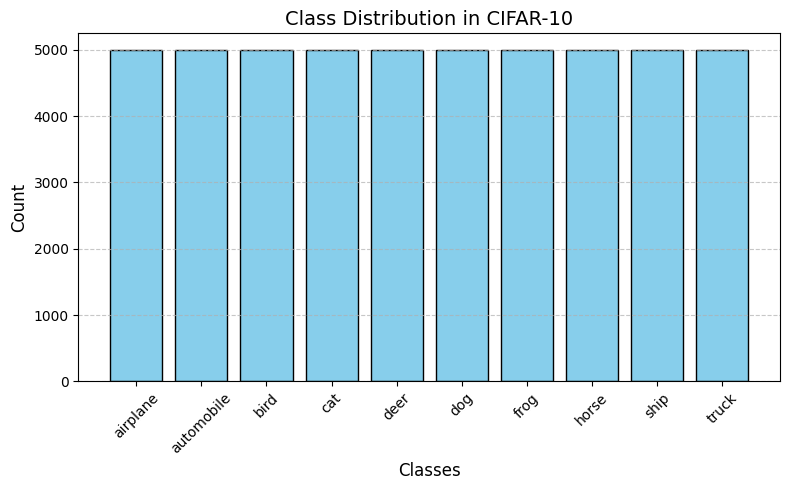

In [20]:
# Class Distribution Visualization
from collections import Counter

# Extract all labels from the trainin dataset
labels_list = [label for _, label in train_data]
counts = Counter(labels_list)

# Plot the class distribution
plt.figure(figsize=(8,5))
plt.bar(classes, counts.values(), color='skyblue', edgecolor='black')
plt.title("Class Distribution in CIFAR-10", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
# Compute Normalization Constants
def compute_mean_std(loader):
    # Compute mean and standard deviatin across the dataset"
    mean = 0.0
    std = 0.0
    total_images =0

    for images, _ in loader:
        batch_samples = images.size(0)
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images += batch_samples

    mean /= total_images
    std /= total_images
    return mean, std

mean, std = compute_mean_std(train_loader)
print(f"📊 Dataset mean: {mean}")
print(f"📊 Dataset std: {std}")

📊 Dataset mean: tensor([0.4914, 0.4822, 0.4465])
📊 Dataset std: tensor([0.1953, 0.1925, 0.1942])


In [22]:
# Save Normalization Parameters

# Ensure the processed data directory exists
os.makedirs("../data/processed", exist_ok=True)

# Save normalization constants as a NumPy archive
np.savez(
    "../data/processed/normalization_constants.npz",
    mean=mean.numpy(),
    std=std.numpy()
)

print("✅ Saved normalization constants to ../data/processed/normalization_constants.npz")

# Optional: verify contents
data = np.load("../data/processed/normalization_constants.npz")
print("Mean loaded:", data["mean"])
print("Std loaded:", data["std"])

✅ Saved normalization constants to ../data/processed/normalization_constants.npz
Mean loaded: [0.49139977 0.48215896 0.4465313 ]
Std loaded: [0.19525273 0.1924727  0.19419934]


In [ ]:
---

# ✅ Summary — Data Exploration & Preprocessing

### 🎯 **Objectives Completed**
- ✅ Loaded and verified the **CIFAR-10** dataset  
- ✅ Visualized sample images with clear class labels  
- ✅ Analyzed **class distribution** for balance  
- ✅ Computed dataset **mean and standard deviation** for normalization  
- ✅ Saved normalization constants to `/data/processed/` for reuse in training  

---

### 🧠 **Key Takeaways**
- **Normalization** ensures model stability and faster convergence.  
- **Balanced classes** simplify model optimization and evaluation.  
- **Consistent preprocessing** between training and inference prevents model drift.  

---

### 🚀 **Next Step**
Proceed to **`02_training.ipynb`** to:
- Implement **transfer learning** using a pretrained **ResNet18** model  
- Fine-tune it on the CIFAR-10 dataset  
- Visualize loss and accuracy curves  
- Save the trained model weights to `/models/best_model.pt`  

---

**Notebook:** `01_exploration.ipynb`  
**Author:** Kevin Woods  
**Project:** Image Classification API — Applied ML Engineer Journey (Week 3)
